In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
kaggle=files.upload()

Saving kaggle.json to kaggle.json


# Extracting The **Data**

In [ ]:
import os
os.makedirs('/root/.kaggle',exist_ok=True)
os.rename('kaggle.json','/root/.kaggle/kaggle.json')

In [ ]:
!pip install kaggle

In [ ]:
!kaggle competitions download -c playground-series-s4e8

playground-series-s4e8.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
import zipfile
zip_file = 'playground-series-s4e8.zip'
extract_dir = 'playground-series-s4e8'
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [ ]:
# Step 6: List files in the extracted directory
extracted_files = os.listdir(extract_dir)
print(extracted_files)  # Check for test.csv in the list

['train.csv', 'sample_submission.csv', 'test.csv']


In [ ]:
test_file_path = os.path.join(extract_dir, 'train.csv')
data1 = pd.read_csv(test_file_path,index_col=0)
data1

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,,
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,12.14,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,e,10.88,s,NaN,w,t,d,c,p,6.65,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,p,7.82,x,e,e,f,a,NaN,w,9.51,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a


In [ ]:
data1.shape

(3116945, 21)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3116945 entries, 0 to 3116944
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 523.2+ MB


In [ ]:
data1.isna().sum()

,0
class,0
cap-diameter,4
cap-shape,40
cap-surface,671023
cap-color,12
does-bruise-or-bleed,8
gill-attachment,523936
gill-spacing,1258435
gill-color,57
stem-height,0


In [ ]:
#droping columns with 50% of NAN values
def drop_col(data):
    for value in data.columns:
        if (data[value].isna().sum())/len(data) * 100 >=50:
            data.pop(value)
    return data
drop_col(data1)
data1.shape

(3116945, 16)

In [ ]:
#seperating Categorical from numerical:
def seperation(data):
    categorical_col=[]
    continous=[]
    for i in data.columns:
        if data[i].dtype=='object':
            categorical_col.append(i)
    for i in data.columns:
        if i not in categorical_col:
            continous.append(i)
    return categorical_col,continous

cat_col,cont_col=seperation(data1)
print(cat_col)
print(cont_col)

['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']
['cap-diameter', 'stem-height', 'stem-width']


## EDA *ANALYSIS*

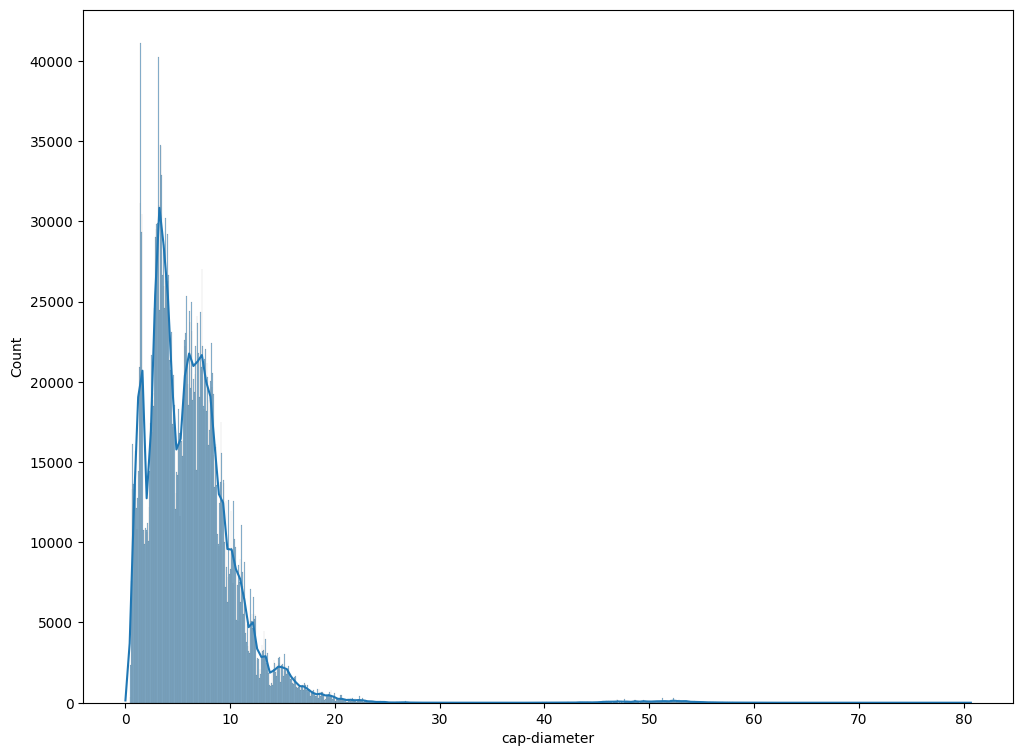

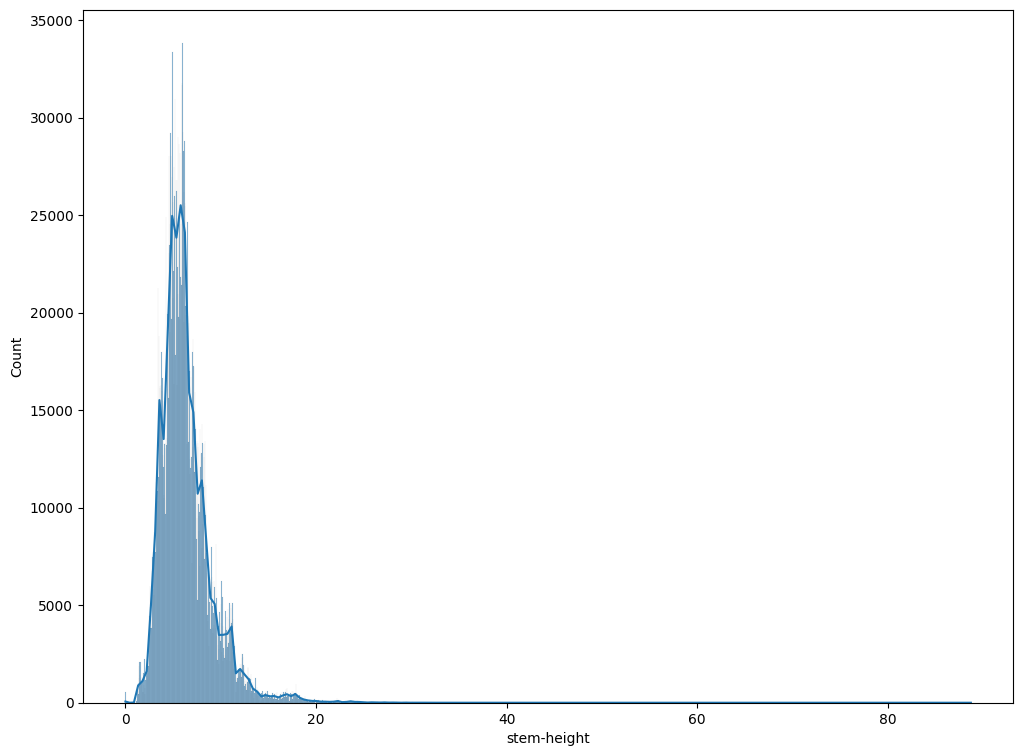

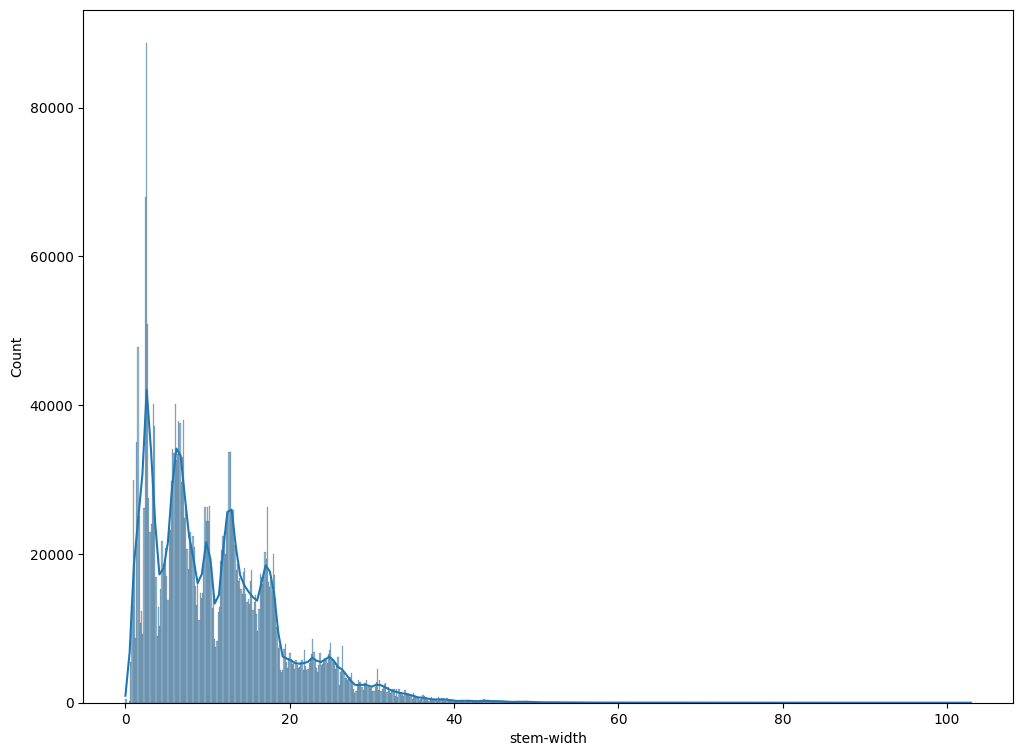

In [ ]:
for features in cont_col:
   plt.figure(figsize=(12,9))
   sns.histplot(
       data=data1,
       x=features,
       bins='fd',
       kde=True,
   )


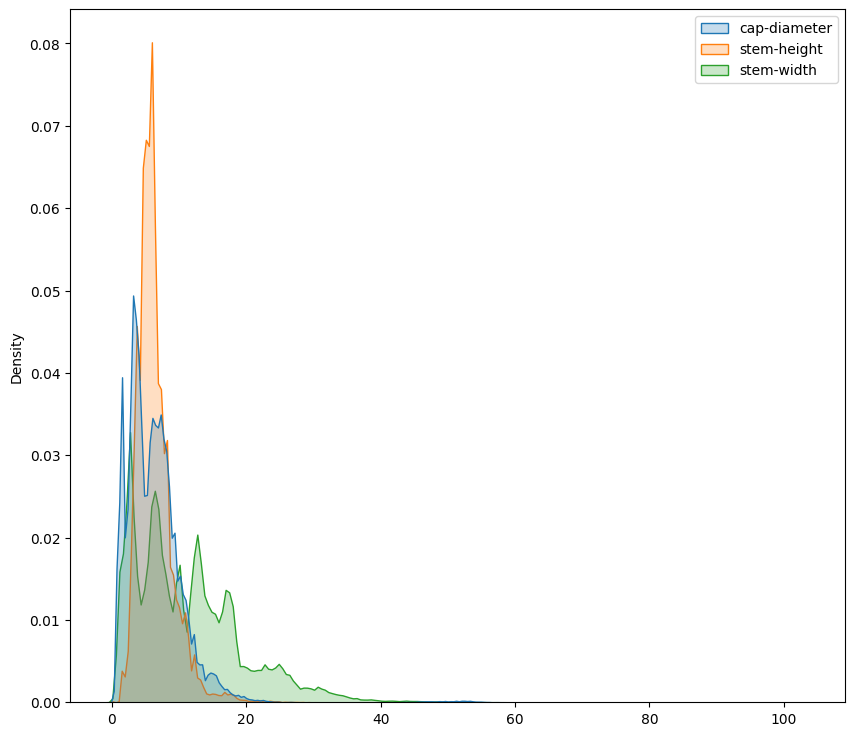

In [ ]:
plt.figure(figsize=(10,9))
sns.kdeplot(data1[cont_col], bw_adjust=0.8,fill=True)
plt.show()

class
p    1705396
e    1411549
Name: count, dtype: int64


Text(0.5, 1.0, 'Mushroom')

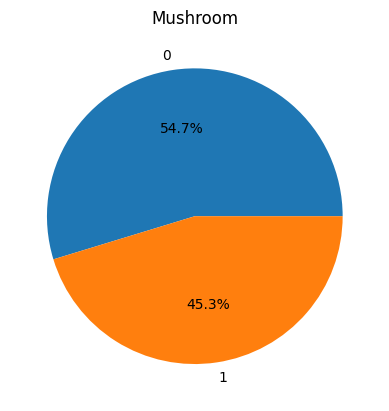

In [ ]:
class_count=data1["class"].value_counts()
print(class_count)
plt.pie(class_count,autopct='%1.1f%%',labels=[0,1])
plt.title("Mushroom")

In [ ]:
def visual_cont(cols,data):

    for col in cols:
        fig,ax=plt.subplots(1,2, figsize=(10,9))
        sns.hisplot(data=data1,x=col,kde=True,bins='doane',ax=ax[0])
        sns.boxplot(data=data,x=col,ax=ax[1])
        ax[0].set_title(f'Histogram of {col} features')
        ax[0].set_xlabel(col)
        ax[0].set_ylabel('distribution')

        ax[1].set_title(f'Histogram of {col} features')
        ax[1].set_xlabel(col)
        ax[1].set_ylabel('frequency/count')

        plt.tight_layout()
        plt.show()

In [ ]:
def visual_cat(cols,data):

    for col in cols:
      plt.figure(figsize=(10,9))
      sns.countplot(data=data,x=col)
      plt.xticks(rotation=90)
      plt.title(f'CountPlot-{col}')
      plt.xlabel(col)
      plt.ylabel('count')


In [ ]:
#visual_cont(cont_col,data1)

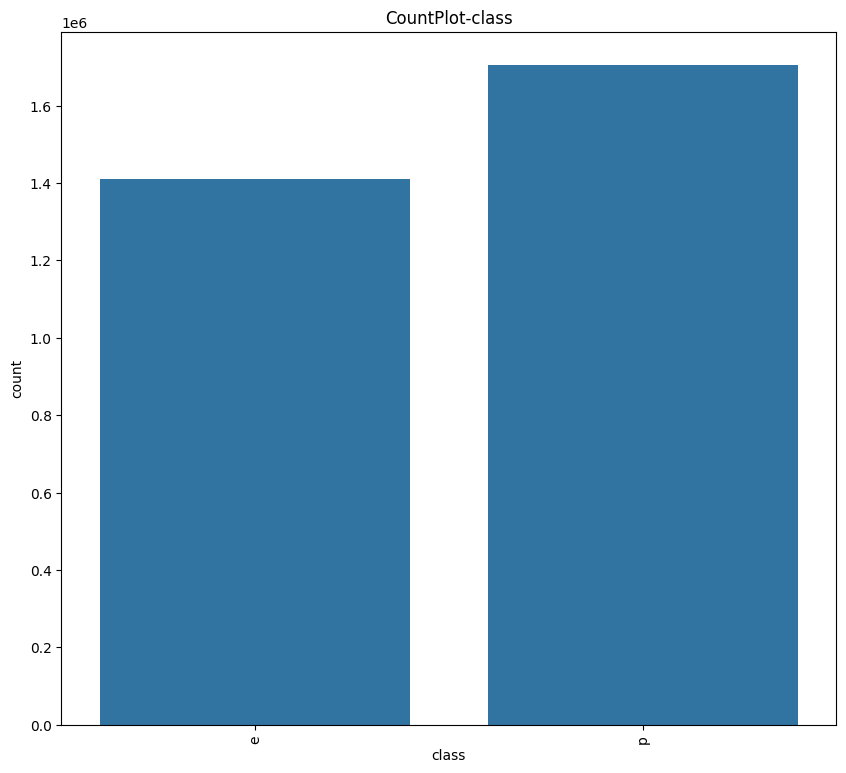

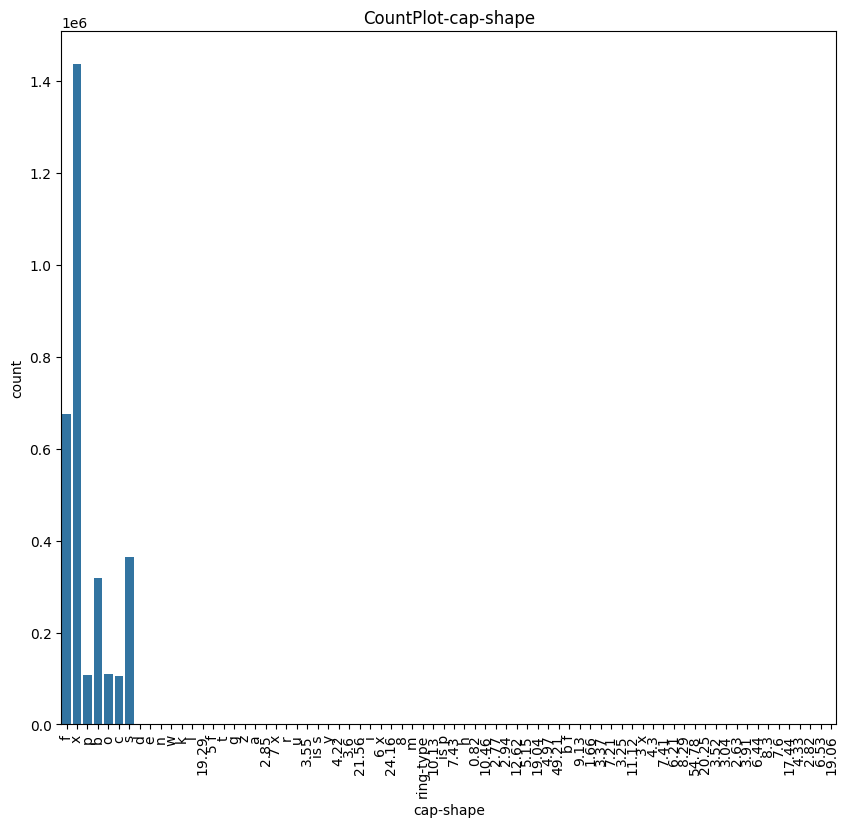

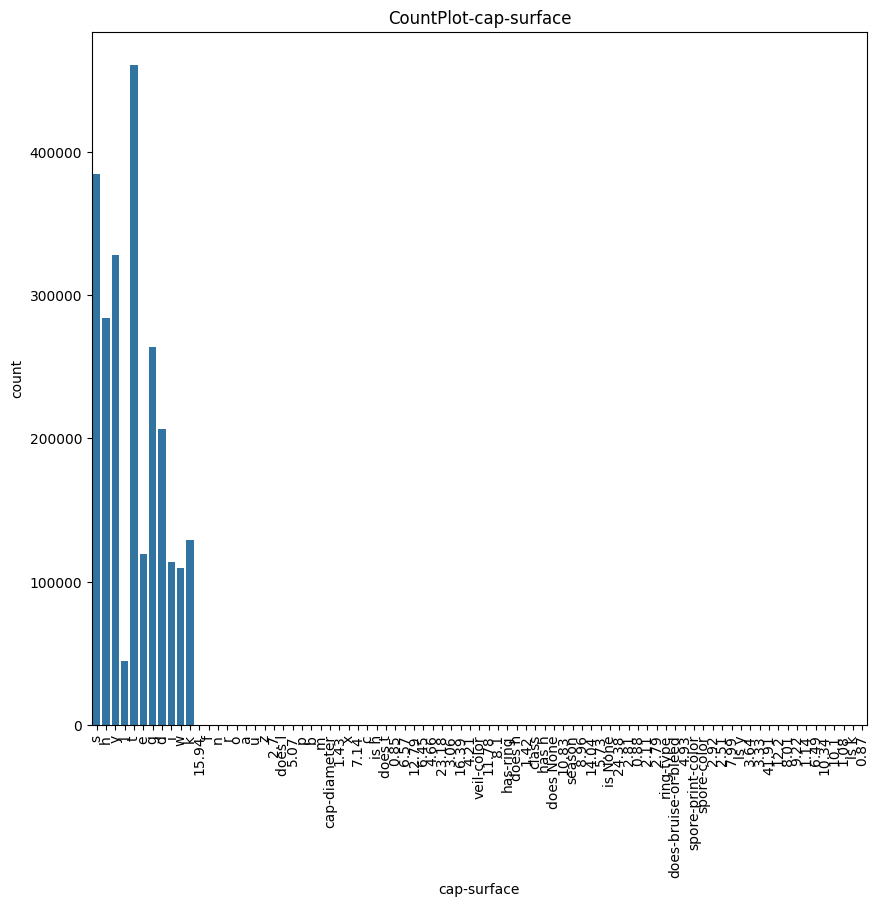

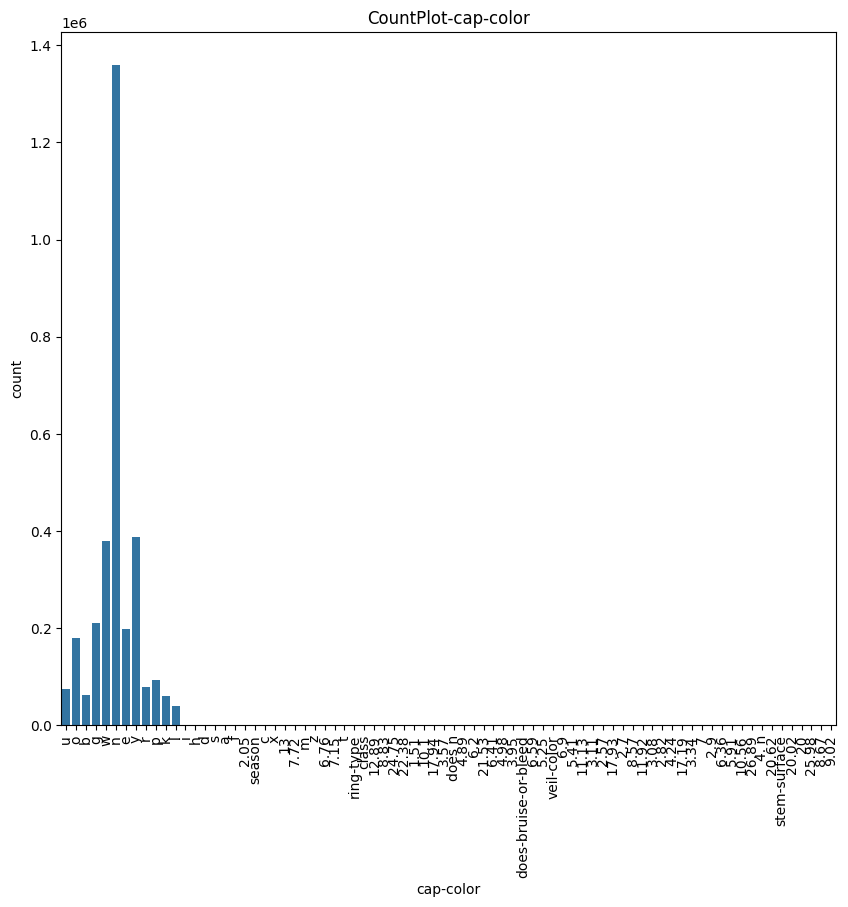

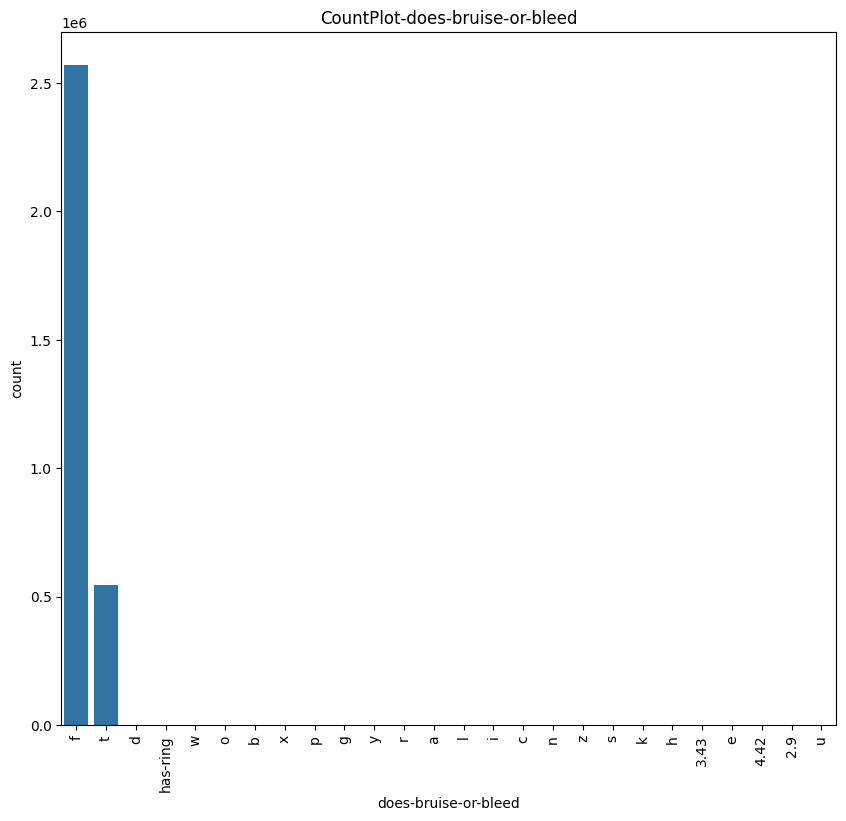

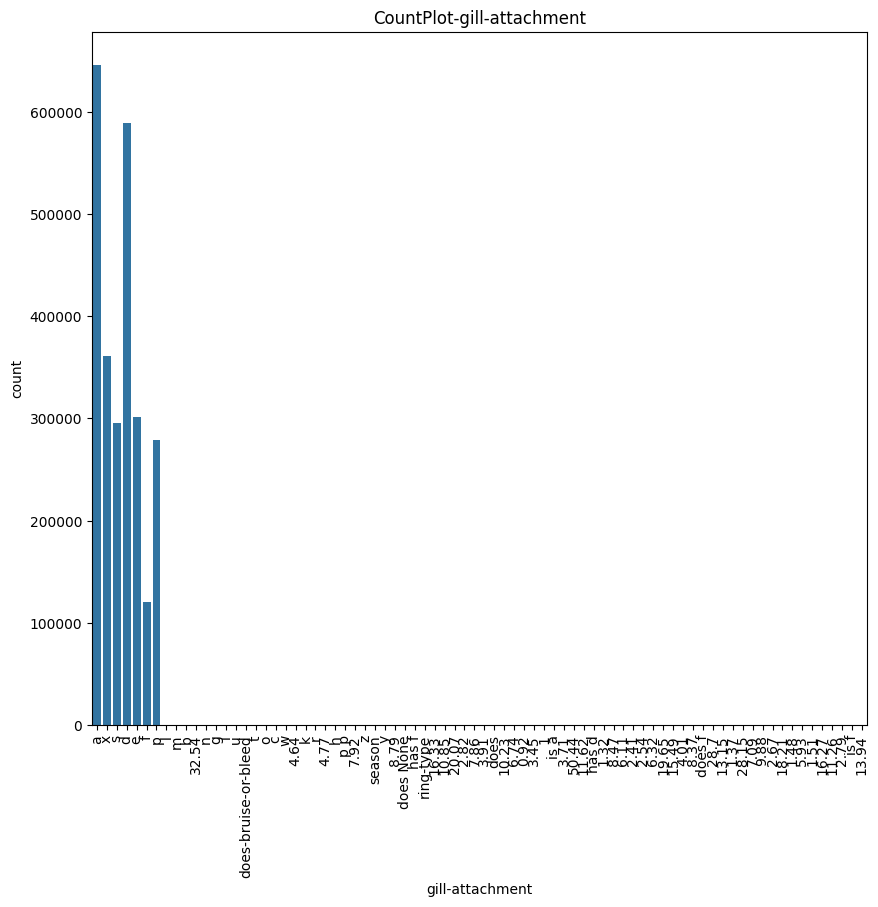

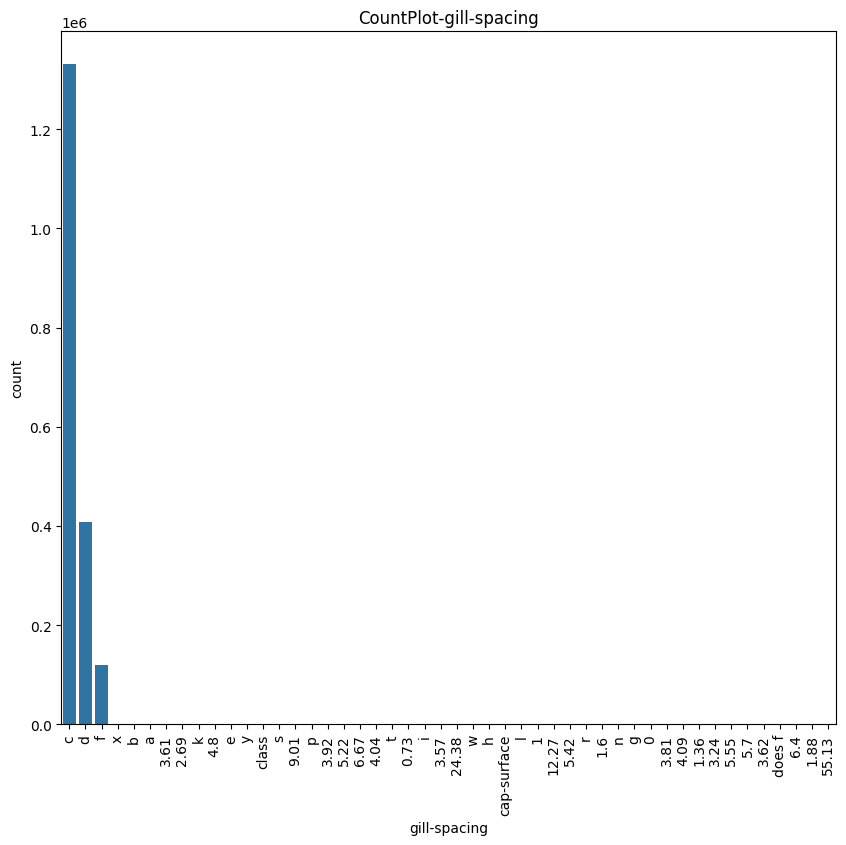

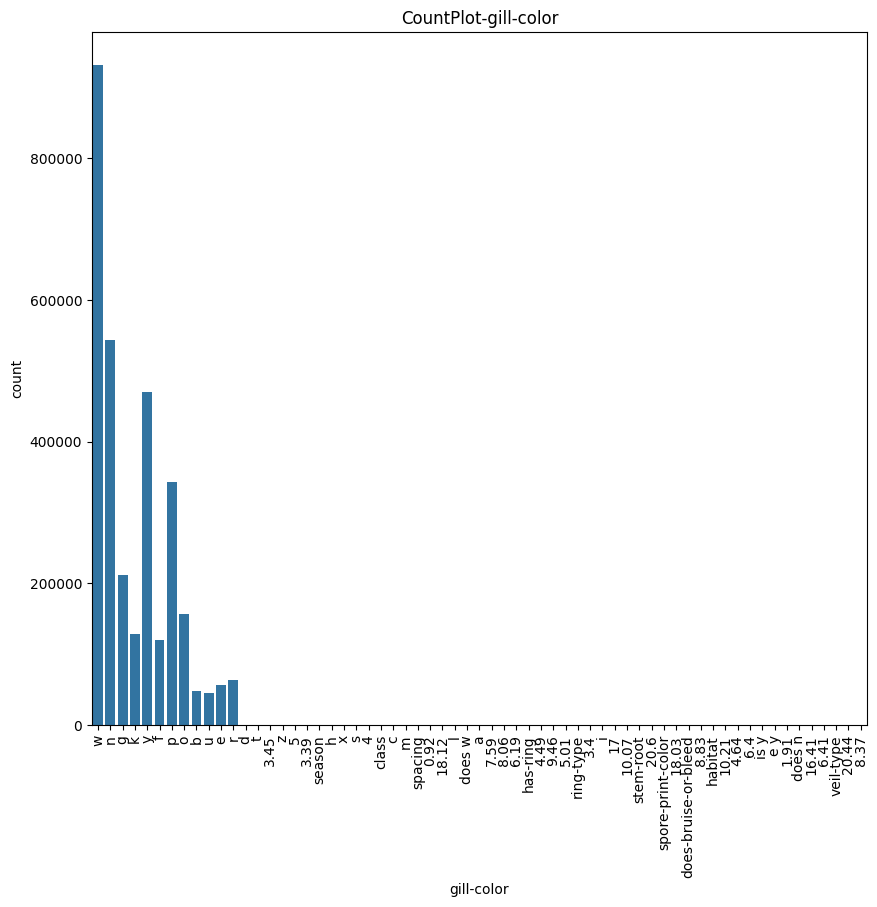

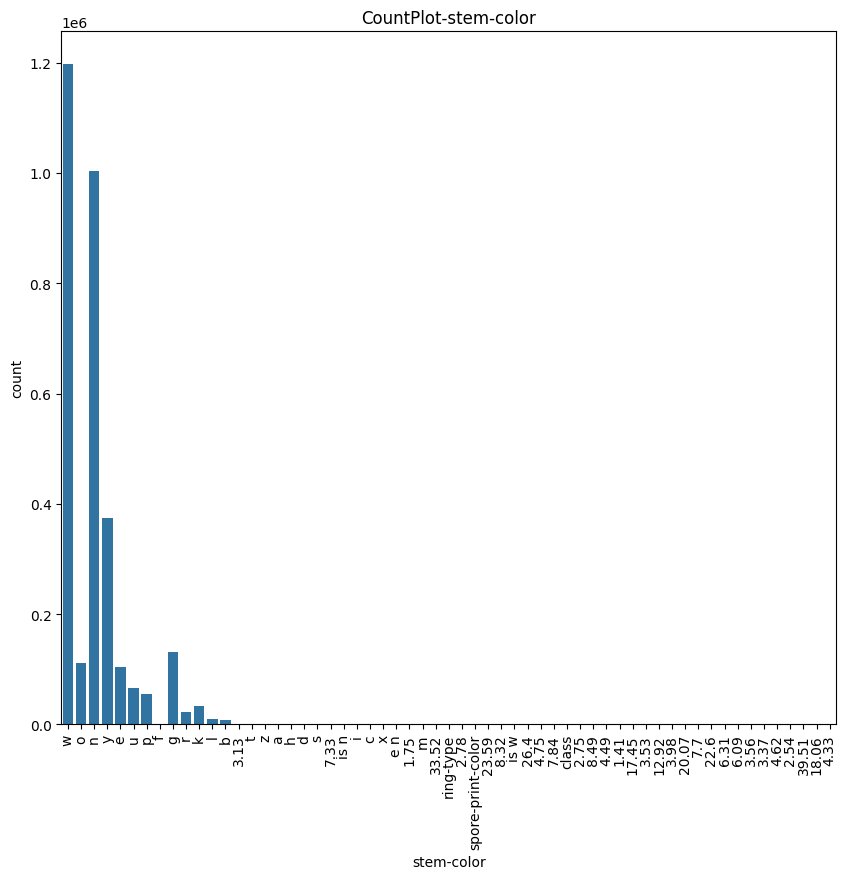

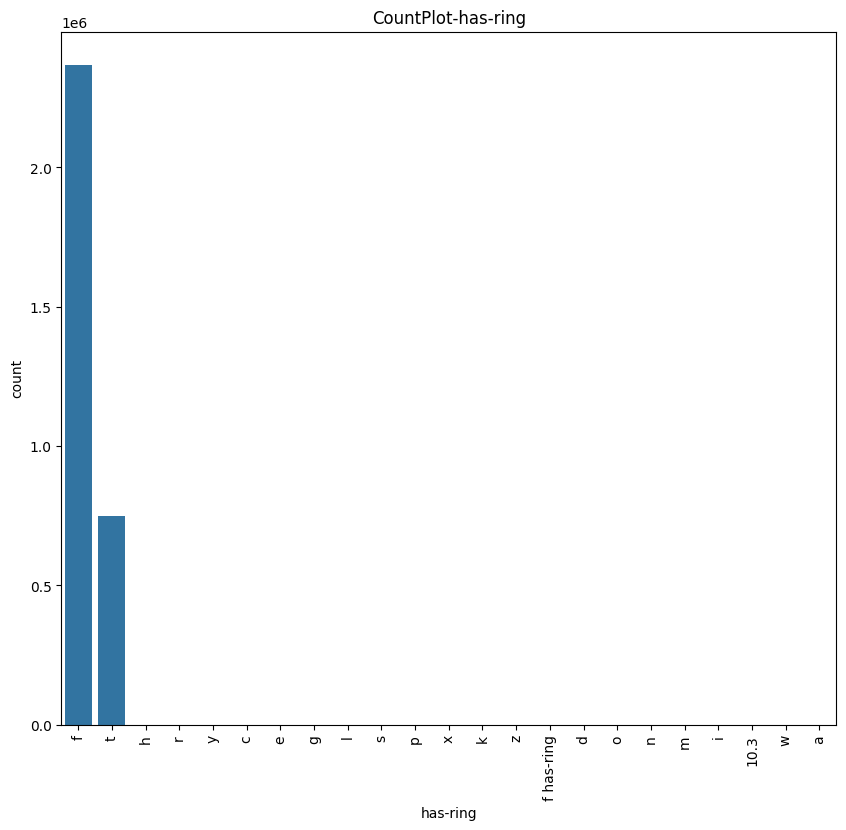

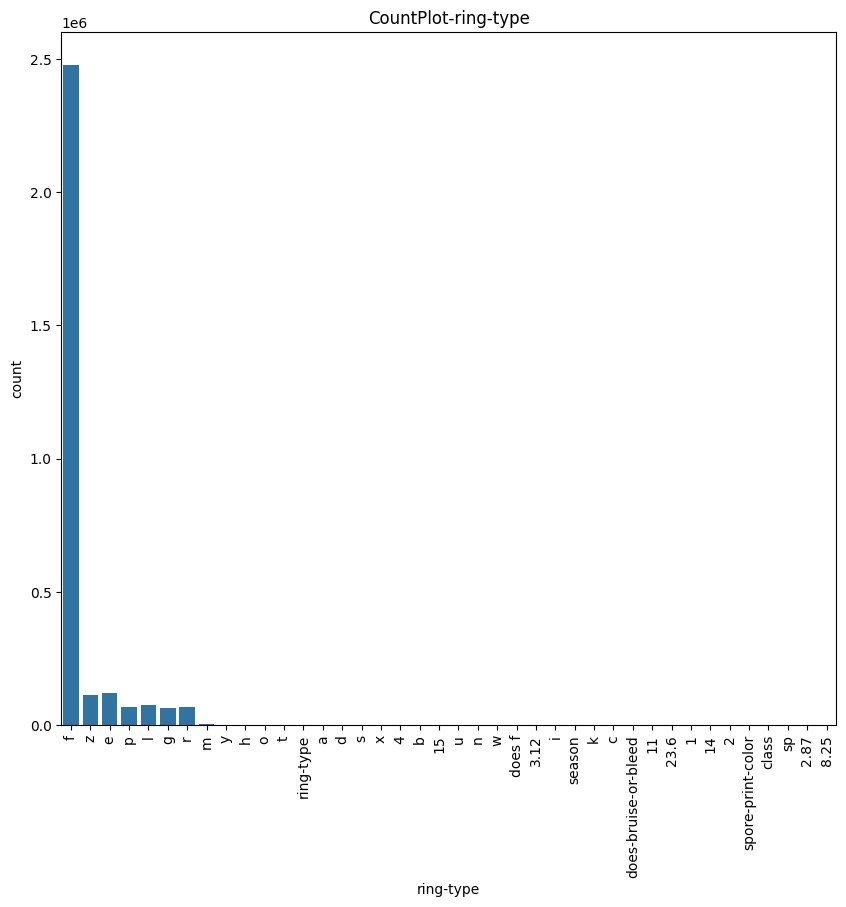

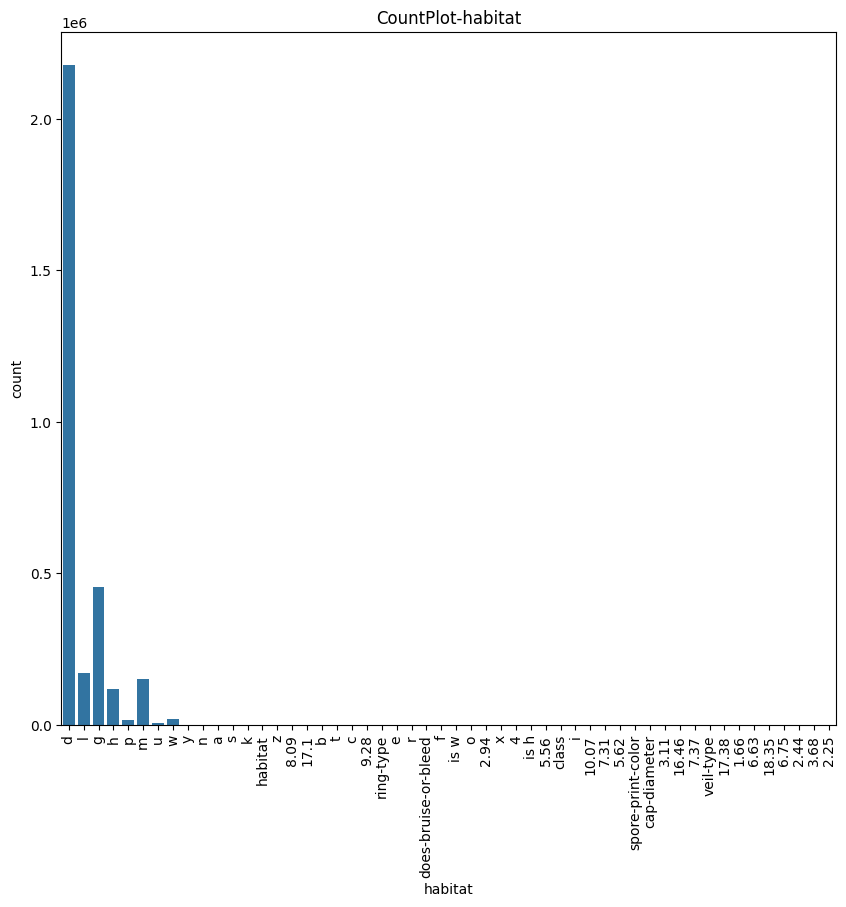

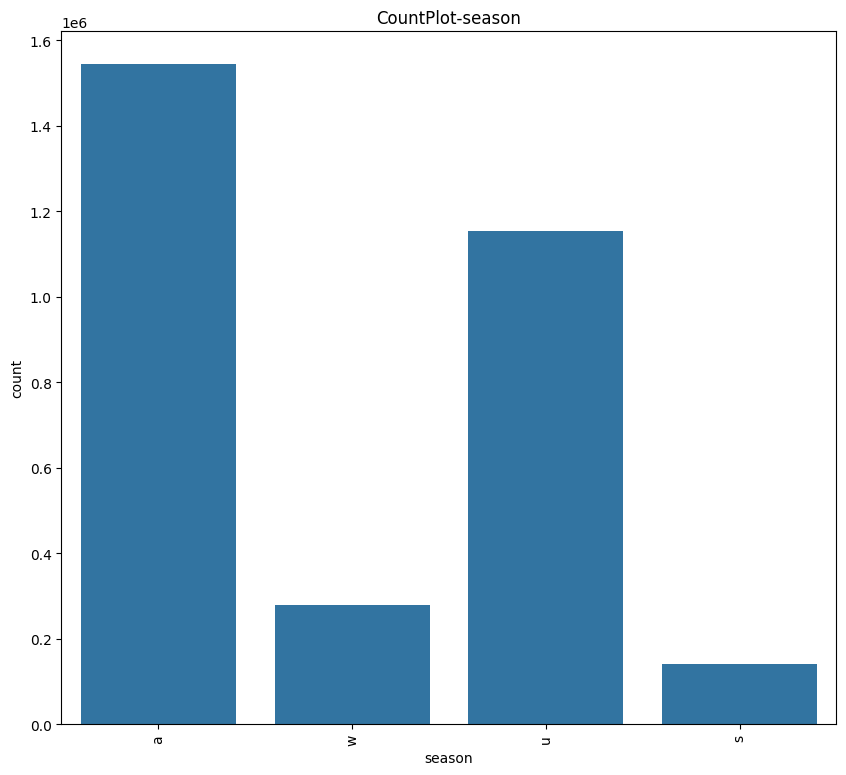

In [ ]:
visual_cat(cat_col,data1)

# **Data Preprocessing or Feature Engineering**

In [ ]:
#seeing unique value of the categorical cols
def unique_col_count(data):
    for value in data.columns:
        print(value,data[value].unique(),end=' ')
        print('\n')

unique_col_count(data1[cat_col])

class ['e' 'p'] 

cap-shape ['f' 'x' 'p' 'b' 'o' 'c' 's' 'd' 'e' 'n' nan 'w' 'k' 'l' '19.29' '5 f' 't'
 'g' 'z' 'a' '2.85' '7 x' 'r' 'u' '3.55' 'is s' 'y' '4.22' '3.6' '21.56'
 'i' '6 x' '24.16' '8' 'm' 'ring-type' '10.13' 'is p' '7.43' 'h' '0.82'
 '10.46' '2.77' '2.94' '12.62' '5.15' '19.04' '4.97' '49.21' 'b f' '9.13'
 '1.66' '3.37' '7.21' '3.25' '11.12' '3 x' '4.3' '7.41' '6.21' '8.29'
 '54.78' '20.25' '3.52' '3.04' '2.63' '3.91' '6.44' '8.3' '7.6' '17.44'
 '4.33' '2.82' '6.53' '19.06'] 

cap-surface ['s' 'h' 'y' 'l' 't' 'e' 'g' nan 'd' 'i' 'w' 'k' '15.94' 'f' 'n' 'r' 'o'
 'a' 'u' 'z' '2.7' 'does l' '5.07' 'p' 'b' 'm' 'cap-diameter' '1.43' 'x'
 '7.14' 'c' 'is h' 'does t' '0.85' '6.57' '12.79' '6.45' '4.66' '23.18'
 '3.06' '16.39' '4.21' 'veil-color' '11.78' '8.1' 'has-ring' 'does h'
 '1.42' 'class' 'has h' 'does None' '10.83' 'season' '8.96' '14.04' '5.73'
 'is None' '24.38' '2.81' '0.88' '2.11' '2.79' 'ring-type'
 'does-bruise-or-bleed' '4.93' 'spore-print-color' 'spore-color' '2.9

In [ ]:
data1.drop_duplicates(inplace=True)
data1.shape

(3116468, 16)

In [ ]:
data1.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season'],
      dtype='object')

In [ ]:
columns_to_clean = [
    'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
    'gill-attachment', 'gill-spacing', 'gill-color',  'stem-color',  'has-ring',
    'ring-type',  'habitat'
]

In [ ]:
valid_categories = {
    'cap-shape': ['f', 'x', 'p', 'b', 'o', 'c', 's'],
    'cap-surface': ['s', 'h', 'y', 'l'],
    'cap-color': ['u', 'o', 'b', 'g', 'w', 'n', 'e', 'y', 'r', 'p', 'k'],
    'does-bruise-or-bleed': ['f', 't'],
    'gill-attachment': ['a', 'x', 's', 'd'],
    'gill-spacing': ['c', 'd'],
    'gill-color': ['w', 'n', 'g', 'k'],
    'stem-color': ['w', 'o', 'n', 'y', 'e'],
    'has-ring': ['f', 't'],
    'ring-type': ['f', 'z', 'e', 'p'],
    'habitat': ['d', 'l', 'g', 'h', 'p', 'm', 'u']
}

In [ ]:
for col in columns_to_clean:
    data1[col]=data1[col].apply(lambda x:x if x in valid_categories[col] else np.nan )

In [ ]:
unique_col_count(data1)

class ['e' 'p'] 

cap-diameter [ 8.8   4.51  6.94 ... 38.11 55.63 54.07] 

cap-shape ['f' 'x' 'p' 'b' 'o' 'c' 's' nan] 

cap-surface ['s' 'h' 'y' 'l' nan] 

cap-color ['u' 'o' 'b' 'g' 'w' 'n' 'e' 'y' 'r' 'p' 'k' nan] 

does-bruise-or-bleed ['f' 't' nan] 

gill-attachment ['a' 'x' 's' 'd' nan] 

gill-spacing ['c' nan 'd'] 

gill-color ['w' 'n' 'g' 'k' nan] 

stem-height [ 4.51  4.79  6.85 ... 26.09 47.33 26.53] 

stem-width [15.39  6.48  9.93 ... 66.91 79.92 53.44] 

stem-color ['w' 'o' 'n' 'y' 'e' nan] 

has-ring ['f' 't' nan] 

ring-type ['f' 'z' 'e' nan 'p'] 

habitat ['d' 'l' 'g' 'h' 'p' 'm' 'u' nan] 

season ['a' 'w' 'u' 's'] 



In [ ]:
#droping columns with 50% of NAN values
drop_col(data1)
data1.shape

(3116468, 15)

In [ ]:
data1.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season'],
      dtype='object')

In [ ]:
cat_col,cont_col=seperation(data1)
print(cat_col)

['class', 'cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

imputer = SimpleImputer(strategy='most_frequent')
data1[cat_col]=imputer.fit_transform(data1[cat_col])

data1[cat_col]

,class,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-color,has-ring,ring-type,habitat,season
id,,,,,,,,,,,,
0,e,f,u,f,a,c,w,w,f,f,d,a
1,p,x,o,f,a,c,n,o,t,z,d,w
2,e,f,b,f,x,c,w,n,f,f,l,w
3,e,f,g,f,s,c,g,w,f,f,d,u
4,e,x,w,f,d,c,w,w,f,f,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,f,n,t,a,c,w,w,t,f,d,u
3116941,e,s,w,t,d,c,w,w,f,f,d,u
3116942,p,x,e,f,a,c,w,y,t,z,d,a


In [ ]:
knn_imputer = KNNImputer(n_neighbors=10, weights='distance')
data1[cont_col]=knn_imputer.fit_transform(data1[cont_col])
data1[cont_col]

,cap-diameter,stem-height,stem-width
id,,,
0,8.80,4.51,15.39
1,4.51,4.79,6.48
2,6.94,6.85,9.93
3,3.88,4.16,6.53
4,5.85,3.37,8.36
...,...,...,...
3116940,9.29,12.14,18.81
3116941,10.88,6.65,26.97
3116942,7.82,9.51,11.06


In [ ]:
data1.isna().sum()


,0
class,0
cap-diameter,0
cap-shape,0
cap-color,0
does-bruise-or-bleed,0
gill-attachment,0
gill-spacing,0
gill-color,0
stem-height,0
stem-width,0


class
p    1705023
e    1411445
Name: count, dtype: int64


Text(0.5, 1.0, 'Mushroom')

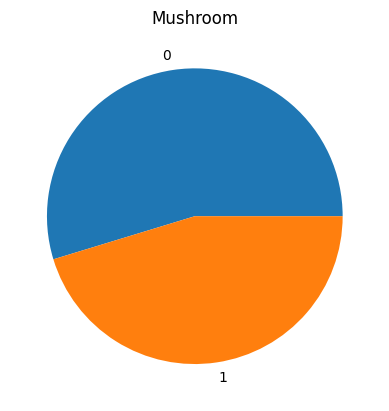

In [ ]:
class_count=data1["class"].value_counts()
print(class_count)
plt.pie(class_count,labels=[0,1])
plt.title("Mushroom")

In [ ]:
#label encoding:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for col in cat_col:
    if col=='season':
        continue
    data1[col]=enc.fit_transform(data1[col])
data1

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
id,,,,,,,,,,,,,,,
0,0,8.80,2,8,0,0,0,3,4.51,15.39,3,0,1,0,a
1,1,4.51,6,5,0,0,0,2,4.79,6.48,2,1,3,0,w
2,0,6.94,2,0,0,3,0,3,6.85,9.93,1,0,1,3,w
3,0,3.88,2,2,0,2,0,0,4.16,6.53,3,0,1,0,u
4,0,5.85,6,9,0,1,0,3,3.37,8.36,3,0,1,1,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,0,9.29,2,4,1,0,0,3,12.14,18.81,3,1,1,0,u
3116941,0,10.88,5,9,1,1,0,3,6.65,26.97,3,0,1,0,u
3116942,1,7.82,6,1,0,0,0,3,9.51,11.06,4,1,3,0,a


In [ ]:
data1=pd.get_dummies(data1,columns=['season'])

Text(0.5, 1.0, 'correlation matric')

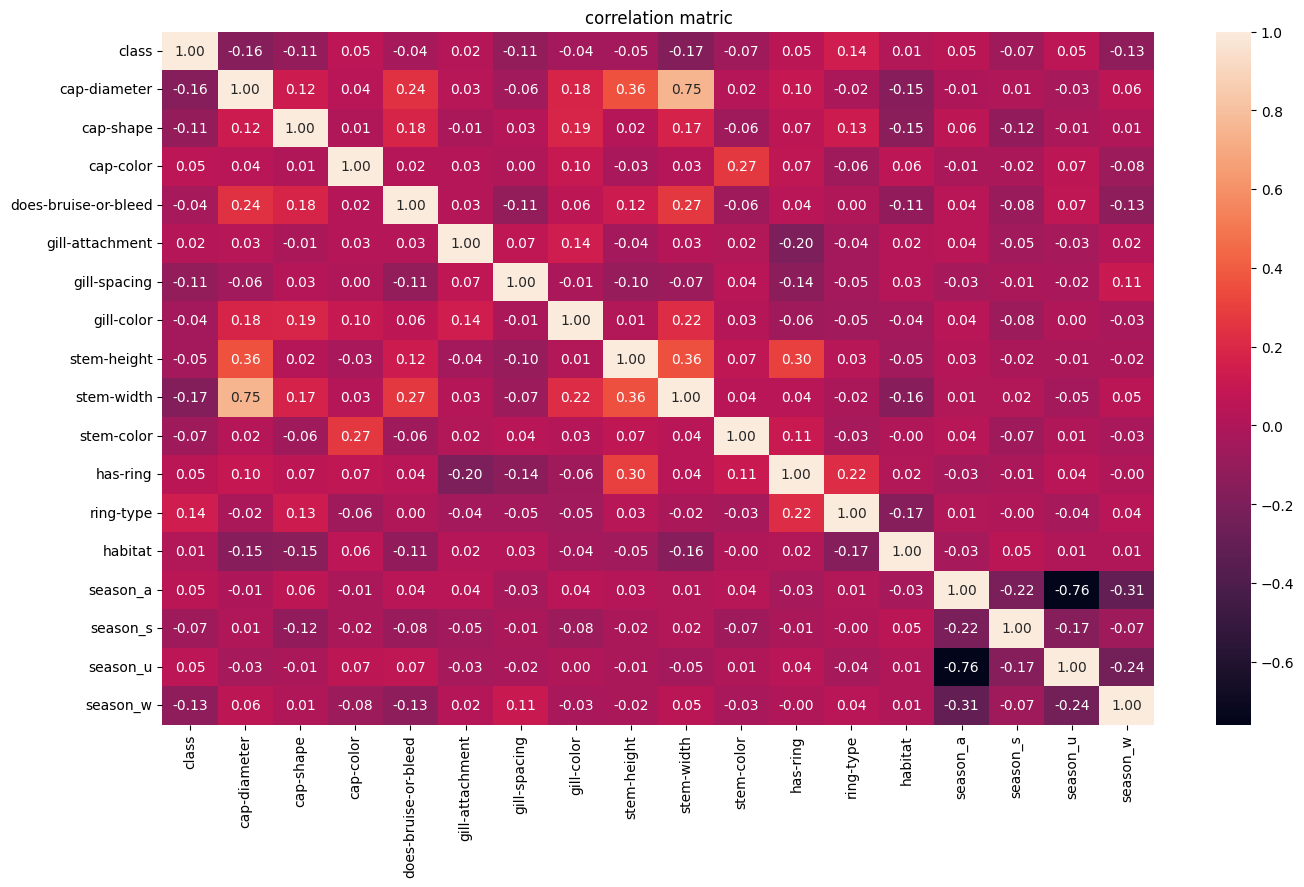

In [ ]:
plt.figure(figsize=(16,9))
matrics=data1.corr()
sns.heatmap(matrics,annot=True,fmt=".2f")
plt.title("correlation matric")

In [ ]:
#interaction Effect
data1['cap-diameter * stem-height']=data1['cap-diameter']*data1['stem-height']
data1['cap-diameter * stem-width']=data1['cap-diameter']*data1['stem-width']
data1['stem-height * stem-width']=data1['stem-height']*data1['stem-width']
data1['stem-height * has-ring']=data1['stem-height']*data1['has-ring']
data1['ring-type * has-ring']=data1['ring-type']*data1['has-ring']
data1['cap-diameter * does-bruise-or-bleed']=data1['cap-diameter']*data1['does-bruise-or-bleed']
data1['gill-attachment * gill-color']=data1['gill-attachment']*data1['gill-color']
data1['stem-width * gill-color']=data1['stem-width']*data1['gill-color']

In [ ]:
data1['cap-diameter * stem-height']=data1['cap-diameter * stem-height'].astype('float32')
data1['cap-diameter * stem-width']=data1['cap-diameter * stem-width'].astype('float32')
data1['stem-height * stem-width']=data1['stem-height * stem-width'].astype('float32')
data1['stem-height * has-ring']=data1['stem-height * has-ring'].astype('float32')
data1['ring-type * has-ring']=data1['ring-type * has-ring'].astype('float32')
data1['cap-diameter * does-bruise-or-bleed']=data1['cap-diameter * does-bruise-or-bleed'].astype('float32')
data1['gill-attachment * gill-color']=data1['gill-attachment * gill-color'].astype('float32')
data1['stem-width * gill-color']=data1['stem-width * gill-color'].astype('float32')
data1[cont_col]=data1[cont_col].astype('float32')


In [ ]:
def square_col(data,col=[]):
    for val in col:
        data[val+'**2']=data[val]**2
    return data

In [ ]:
cont_col=['cap-diameter', 'stem-height', 'stem-width','stem-height * stem-width','cap-diameter * stem-height','cap-diameter * stem-width','stem-height * has-ring','ring-type * has-ring','cap-diameter * does-bruise-or-bleed','gill-attachment * gill-color','stem-width * gill-color']

In [ ]:
data1=square_col(data1,col=cont_col)
data1.shape

(3116468, 37)

In [ ]:
data1

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-height**2,stem-width**2,stem-height * stem-width**2,cap-diameter * stem-height**2,cap-diameter * stem-width**2,stem-height * has-ring**2,ring-type * has-ring**2,cap-diameter * does-bruise-or-bleed**2,gill-attachment * gill-color**2,stem-width * gill-color**2
id,,,,,,,,,,,,,,,,,,,,,
0,0,8.80,2,8,0,0,0,3,4.51,15.390000,...,20.340101,236.852112,4817.595215,1575.137329,18341.828125,0.000000,0.0,0.000000,0.0,2131.668701
1,1,4.51,6,5,0,0,0,2,4.79,6.480000,...,22.944099,41.990398,963.431946,466.685272,854.088928,22.944099,9.0,0.000000,0.0,167.961594
2,0,6.94,2,0,0,3,0,3,6.85,9.930000,...,46.922497,98.604904,4626.788574,2259.956543,4749.166992,0.000000,0.0,0.000000,81.0,887.444153
3,0,3.88,2,2,0,2,0,0,4.16,6.530000,...,17.305599,42.640903,737.926392,260.525452,641.933105,0.000000,0.0,0.000000,0.0,0.000000
4,0,5.85,6,9,0,1,0,3,3.37,8.360000,...,11.356899,69.889595,793.729248,388.661530,2391.796631,0.000000,0.0,0.000000,9.0,629.006409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,0,9.29,2,4,1,0,0,3,12.14,18.809999,...,147.379608,353.816071,52145.273438,12719.463867,30535.781250,147.379608,1.0,86.304100,0.0,3184.344971
3116941,0,10.88,5,9,1,1,0,3,6.65,26.969999,...,44.222500,727.380859,32166.599609,5234.811523,86103.273438,0.000000,0.0,118.374405,9.0,6546.428711
3116942,1,7.82,6,1,0,0,0,3,9.51,11.060000,...,90.440102,122.323608,11062.958984,5530.629395,7480.381348,90.440102,9.0,0.000000,0.0,1100.912476


Text(0.5, 1.0, 'correlation matric')

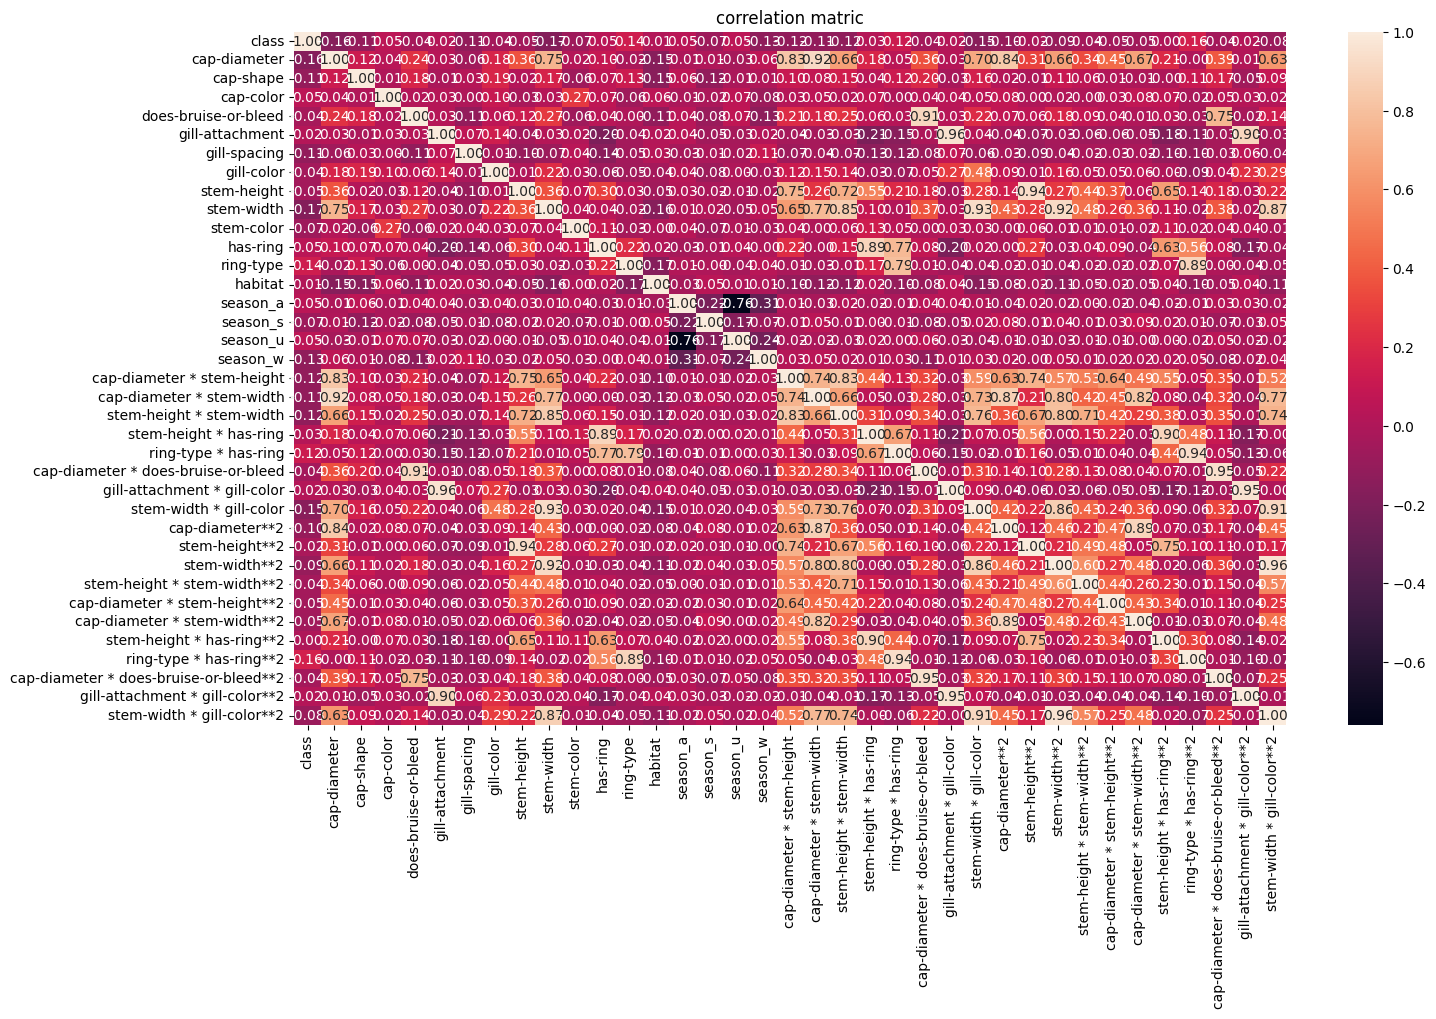

In [ ]:
plt.figure(figsize=(16,9))
matrics=data1.corr()
sns.heatmap(matrics,annot=True,fmt=".2f")
plt.title("correlation matric")

In [ ]:
data1

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-height**2,stem-width**2,stem-height * stem-width**2,cap-diameter * stem-height**2,cap-diameter * stem-width**2,stem-height * has-ring**2,ring-type * has-ring**2,cap-diameter * does-bruise-or-bleed**2,gill-attachment * gill-color**2,stem-width * gill-color**2
id,,,,,,,,,,,,,,,,,,,,,
0,0,8.80,2,8,0,0,0,3,4.51,15.390000,...,20.340101,236.852112,4817.595215,1575.137329,18341.828125,0.000000,0.0,0.000000,0.0,2131.668701
1,1,4.51,6,5,0,0,0,2,4.79,6.480000,...,22.944099,41.990398,963.431946,466.685272,854.088928,22.944099,9.0,0.000000,0.0,167.961594
2,0,6.94,2,0,0,3,0,3,6.85,9.930000,...,46.922497,98.604904,4626.788574,2259.956543,4749.166992,0.000000,0.0,0.000000,81.0,887.444153
3,0,3.88,2,2,0,2,0,0,4.16,6.530000,...,17.305599,42.640903,737.926392,260.525452,641.933105,0.000000,0.0,0.000000,0.0,0.000000
4,0,5.85,6,9,0,1,0,3,3.37,8.360000,...,11.356899,69.889595,793.729248,388.661530,2391.796631,0.000000,0.0,0.000000,9.0,629.006409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,0,9.29,2,4,1,0,0,3,12.14,18.809999,...,147.379608,353.816071,52145.273438,12719.463867,30535.781250,147.379608,1.0,86.304100,0.0,3184.344971
3116941,0,10.88,5,9,1,1,0,3,6.65,26.969999,...,44.222500,727.380859,32166.599609,5234.811523,86103.273438,0.000000,0.0,118.374405,9.0,6546.428711
3116942,1,7.82,6,1,0,0,0,3,9.51,11.060000,...,90.440102,122.323608,11062.958984,5530.629395,7480.381348,90.440102,9.0,0.000000,0.0,1100.912476


In [ ]:
from sklearn.ensemble import IsolationForest
iso_forest=IsolationForest(contamination=0.05)
data1['anamoly']=iso_forest.fit_predict(data1[cont_col])
data1=data1[data1['anamoly']==1]
data1.drop(columns=['anamoly'],axis=1,inplace=True)

<ipython-input-47-963ba9aa7b55>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop(columns=['anamoly'],axis=1,inplace=True)


In [ ]:
#scalling
from sklearn.preprocessing import RobustScaler
scale=RobustScaler()
data1[cont_col]=scale.fit_transform(data1[cont_col])

<ipython-input-48-3786bfe913b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[cont_col]=scale.fit_transform(data1[cont_col])


In [ ]:
data1


,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-height**2,stem-width**2,stem-height * stem-width**2,cap-diameter * stem-height**2,cap-diameter * stem-width**2,stem-height * has-ring**2,ring-type * has-ring**2,cap-diameter * does-bruise-or-bleed**2,gill-attachment * gill-color**2,stem-width * gill-color**2
id,,,,,,,,,,,,,,,,,,,,,
0,0,0.716450,2,8,0,0,0,3,-0.488462,0.650905,...,20.340101,236.852112,4817.595215,1575.137329,18341.828125,0.000000,0.0,0.000000,0.0,2131.668701
1,1,-0.212121,6,5,0,0,0,2,-0.380769,-0.245473,...,22.944099,41.990398,963.431946,466.685272,854.088928,22.944099,9.0,0.000000,0.0,167.961594
2,0,0.313853,2,0,0,3,0,3,0.411538,0.101610,...,46.922497,98.604904,4626.788574,2259.956543,4749.166992,0.000000,0.0,0.000000,81.0,887.444153
3,0,-0.348485,2,2,0,2,0,0,-0.623077,-0.240443,...,17.305599,42.640903,737.926392,260.525452,641.933105,0.000000,0.0,0.000000,0.0,0.000000
4,0,0.077922,6,9,0,1,0,3,-0.926923,-0.056338,...,11.356899,69.889595,793.729248,388.661530,2391.796631,0.000000,0.0,0.000000,9.0,629.006409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,0,0.822511,2,4,1,0,0,3,2.446154,0.994970,...,147.379608,353.816071,52145.273438,12719.463867,30535.781250,147.379608,1.0,86.304100,0.0,3184.344971
3116941,0,1.166667,5,9,1,1,0,3,0.334615,1.815895,...,44.222500,727.380859,32166.599609,5234.811523,86103.273438,0.000000,0.0,118.374405,9.0,6546.428711
3116942,1,0.504329,6,1,0,0,0,3,1.434615,0.215292,...,90.440102,122.323608,11062.958984,5530.629395,7480.381348,90.440102,9.0,0.000000,0.0,1100.912476


In [ ]:
y_train=data1.pop('class')
x_train=data1

In [ ]:
y_train

,class
id,
0,0
1,1
2,0
3,0
4,0
...,...
3116940,0
3116941,0
3116942,1


In [ ]:
x_train

,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,...,stem-height**2,stem-width**2,stem-height * stem-width**2,cap-diameter * stem-height**2,cap-diameter * stem-width**2,stem-height * has-ring**2,ring-type * has-ring**2,cap-diameter * does-bruise-or-bleed**2,gill-attachment * gill-color**2,stem-width * gill-color**2
id,,,,,,,,,,,,,,,,,,,,,
0,0.716450,2,8,0,0,0,3,-0.488462,0.650905,3,...,20.340101,236.852112,4817.595215,1575.137329,18341.828125,0.000000,0.0,0.000000,0.0,2131.668701
1,-0.212121,6,5,0,0,0,2,-0.380769,-0.245473,2,...,22.944099,41.990398,963.431946,466.685272,854.088928,22.944099,9.0,0.000000,0.0,167.961594
2,0.313853,2,0,0,3,0,3,0.411538,0.101610,1,...,46.922497,98.604904,4626.788574,2259.956543,4749.166992,0.000000,0.0,0.000000,81.0,887.444153
3,-0.348485,2,2,0,2,0,0,-0.623077,-0.240443,3,...,17.305599,42.640903,737.926392,260.525452,641.933105,0.000000,0.0,0.000000,0.0,0.000000
4,0.077922,6,9,0,1,0,3,-0.926923,-0.056338,3,...,11.356899,69.889595,793.729248,388.661530,2391.796631,0.000000,0.0,0.000000,9.0,629.006409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,0.822511,2,4,1,0,0,3,2.446154,0.994970,3,...,147.379608,353.816071,52145.273438,12719.463867,30535.781250,147.379608,1.0,86.304100,0.0,3184.344971
3116941,1.166667,5,9,1,1,0,3,0.334615,1.815895,3,...,44.222500,727.380859,32166.599609,5234.811523,86103.273438,0.000000,0.0,118.374405,9.0,6546.428711
3116942,0.504329,6,1,0,0,0,3,1.434615,0.215292,4,...,90.440102,122.323608,11062.958984,5530.629395,7480.381348,90.440102,9.0,0.000000,0.0,1100.912476


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import log_loss,classification_report,matthews_corrcoef
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.metrics import make_scorer

In [ ]:
x_train,x_cv,y_train,_y_cv=train_test_split(x_train,y_train,test_size=0.3,random_state=42)

# ***Modelling***

In [ ]:
!pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.8 MB/s eta 0:00:00


In [ ]:
mcc_score=make_scorer(matthews_corrcoef)
sfk=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

In [ ]:
def objective(trial):
    xgb_params = {
        'booster': 'gblinear',
        'objective': 'binary:logistic',
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'lambda': trial.suggest_float('lambda', 1e-4, 10.0),
        'alpha': trial.suggest_float('alpha', 1e-4, 10.0),
        'tree_method':'gpu_hist',
        'predictor':'gpu_predictor',
    }

    model=XGBClassifier(**xgb_params)
    model.fit(x_train,y_train)
    preds=model.predict(x_cv)
    score=cross_val_score(estimator=model,X=x_train,y=y_train,cv=sfk,scoring=mcc_score)
    score=np.mean(score)
    return score

In [ ]:
# Create an Optuna study
study = optuna.create_study(direction='maximize')

# Optimize the study
study.optimize(objective, n_trials=20,timeout=1000)

# Get the best hyperparameters
best_params = study.best_params
print(f"Best hyperparameters: {best_params}")

[I 2024-09-16 01:37:14,999] A new study created in memory with name: no-name-49447bad-c0c8-4117-ba6b-4c9a26bd26b3
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:37:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:42:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
best_params=study.best_params
model=XGBClassifier(best_params)
model.fit(x_train,y_train)
model.score(x_cv,_y_cv)

In [ ]:
feature_name=xgb_model.feature_names_in_
feature_importance=xgb_model.feature_importances_
x_gbplot=pd.DataFrame({
    'feature':feature_name,
    'importance':feature_importance
})
x_gbplot=x_gbplot.sort_values(by='importance',ascending=False)
plt.figure(figsize=(12,9))
sns.barplot(x=x_gbplot['importance'],y=x_gbplot['feature'],data=x_gbplot)

In [ ]:
# Extract the best hyperparameters for each model

In [ ]:
xgb_model.fit(x_train,y_train)
xgb_mode1(x_cv,_y_cv)

0.9827312501548086

In [ ]:
y_test=xgb_model.predict(x_cv)
print(classification_report(y_test,_y_cv))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    402532
           1       0.98      0.98      0.98    485662

    accuracy                           0.98    888194
   macro avg       0.98      0.98      0.98    888194
weighted avg       0.98      0.98      0.98    888194



# **Testing**

In [ ]:
test_file_path = os.path.join(extract_dir, 'test.csv')
data2 = pd.read_csv(test_file_path)
data2

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,...,NaN,NaN,e,NaN,NaN,f,f,NaN,d,u
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
2077961,5194906,5.73,x,e,e,f,a,NaN,w,6.16,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,...,NaN,s,g,NaN,NaN,f,f,NaN,d,a


In [ ]:
drop_col(data2)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,17.12,w,t,g,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,10.75,n,f,f,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,3.14,n,f,f,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,8.51,w,t,z,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,13.70,y,t,NaN,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,1.35,e,f,f,d,u
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,7.38,w,f,f,g,a
2077961,5194906,5.73,x,e,e,f,a,NaN,w,6.16,9.74,y,t,z,d,a
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,3.46,g,f,f,d,a


In [ ]:
cate_col,conti_col=seperation(data2)

In [ ]:
columns_to_clean = [
    'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
    'gill-attachment', 'gill-spacing', 'gill-color',  'stem-color',  'has-ring',
    'ring-type',  'habitat'
]

In [ ]:
valid_categories = {
    'cap-shape': ['f', 'x', 'p', 'b', 'o', 'c', 's'],
    'cap-surface': ['s', 'h', 'y', 'l'],
    'cap-color': ['u', 'o', 'b', 'g', 'w', 'n', 'e', 'y', 'r', 'p', 'k'],
    'does-bruise-or-bleed': ['f', 't'],
    'gill-attachment': ['a', 'x', 's', 'd'],
    'gill-spacing': ['c', 'd'],
    'gill-color': ['w', 'n', 'g', 'k'],
    'stem-color': ['w', 'o', 'n', 'y', 'e'],
    'has-ring': ['f', 't'],
    'ring-type': ['f', 'z', 'e', 'p'],
    'habitat': ['d', 'l', 'g', 'h', 'p', 'm', 'u']
}

In [ ]:
for col in columns_to_clean:
    data2[col]=data2[col].apply(lambda x:x if x in valid_categories[col] else np.nan )

In [ ]:
unique_col_count(data2)

id [3116945 3116946 3116947 ... 5194906 5194907 5194908] 

cap-diameter [ 8.64  6.9   2.   ... 58.98 39.12 46.19] 

cap-shape ['x' 'o' 'b' 'f' 's' 'p' 'c' nan] 

cap-surface [nan 'h' 'y' 's' 'l'] 

cap-color ['n' 'o' 'y' 'k' 'b' 'w' 'e' 'g' 'p' 'u' nan 'r'] 

does-bruise-or-bleed ['t' 'f' nan] 

gill-attachment [nan 's' 'x' 'a' 'd'] 

gill-spacing [nan 'c' 'd'] 

gill-color ['w' nan 'n' 'g' 'k'] 

stem-height [11.13  1.27  6.18 ... 38.4   1.01 25.32] 

stem-width [17.12 10.75  3.14 ... 55.11 75.42 42.68] 

stem-color ['w' 'n' 'y' nan 'o' 'e'] 

has-ring ['t' 'f' nan] 

ring-type [nan 'f' 'z' 'e' 'p'] 

habitat ['d' 'p' 'u' 'g' 'h' 'm' 'l' nan] 

season ['a' 's' 'u' 'w'] 



In [ ]:
data2.drop_duplicates(inplace=True)

In [ ]:
drop_col(data2)
data2.shape

(2077964, 15)

In [ ]:
cate_col,conti_col=seperation(data2)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

imputer = SimpleImputer(strategy='most_frequent')
data2[cate_col]=imputer.fit_transform(data2[cate_col])

data2[cate_col]

,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-color,has-ring,ring-type,habitat,season
0,x,n,t,a,c,w,w,t,f,d,a
1,o,o,f,a,c,w,n,f,f,d,a
2,b,n,f,a,c,n,n,f,f,d,s
3,x,n,f,s,c,n,w,t,z,d,u
4,x,y,f,a,c,w,y,t,f,d,u
...,...,...,...,...,...,...,...,...,...,...,...
2077959,x,w,f,a,d,w,e,f,f,d,u
2077960,x,w,f,d,c,w,w,f,f,g,a
2077961,x,e,f,a,c,w,y,t,z,d,a
2077962,b,n,f,a,d,g,w,f,f,d,a


In [ ]:
knn_imputer = KNNImputer(n_neighbors=10, weights='distance')
data2[conti_col]=knn_imputer.fit_transform(data2[conti_col])
data2[conti_col]

,id,cap-diameter,stem-height,stem-width
0,3116945.0,8.64,11.13,17.12
1,3116946.0,6.90,1.27,10.75
2,3116947.0,2.00,6.18,3.14
3,3116948.0,3.47,4.98,8.51
4,3116949.0,6.17,6.73,13.70
...,...,...,...,...
2077959,5194904.0,0.88,2.67,1.35
2077960,5194905.0,3.12,2.69,7.38
2077961,5194906.0,5.73,6.16,9.74
2077962,5194907.0,5.03,6.00,3.46


In [ ]:
for col in cate_col:
    if col=='season':
        continue
    data2[col]=enc.fit_transform(data2[col])
data2

,id,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,3116945.0,8.64,6,4,1,0,0,3,11.13,17.12,3,1,1,0,a
1,3116946.0,6.90,3,5,0,0,0,3,1.27,10.75,1,0,1,0,a
2,3116947.0,2.00,0,4,0,0,0,2,6.18,3.14,1,0,1,0,s
3,3116948.0,3.47,6,4,0,2,0,2,4.98,8.51,3,1,3,0,u
4,3116949.0,6.17,6,10,0,0,0,3,6.73,13.70,4,1,1,0,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904.0,0.88,6,9,0,0,1,3,2.67,1.35,0,0,1,0,u
2077960,5194905.0,3.12,6,9,0,1,0,3,2.69,7.38,3,0,1,1,a
2077961,5194906.0,5.73,6,1,0,0,0,3,6.16,9.74,4,1,3,0,a
2077962,5194907.0,5.03,0,4,0,0,1,0,6.00,3.46,3,0,1,0,a


In [ ]:
data2=pd.get_dummies(data2,columns=['season'])

In [ ]:
data2['cap-diameter * stem-height']=data2['cap-diameter']*data2['stem-height']
data2['cap-diameter * stem-width']=data2['cap-diameter']*data2['stem-width']
data2['stem-height * stem-width']=data2['stem-height']*data2['stem-width']
data2['stem-height * has-ring']=data2['stem-height']*data2['has-ring']
data2['ring-type * has-ring']=data2['ring-type']*data2['has-ring']
data2['cap-diameter * does-bruise-or-bleed']=data2['cap-diameter']*data2['does-bruise-or-bleed']
data2['gill-attachment * gill-color']=data2['gill-attachment']*data2['gill-color']
data2['stem-width * gill-color']=data2['stem-width']*data2['gill-color']

In [ ]:
data2['cap-diameter * stem-height']=data2['cap-diameter * stem-height'].astype('float32')
data2['cap-diameter * stem-width']=data2['cap-diameter * stem-width'].astype('float32')
data2['stem-height * stem-width']=data2['stem-height * stem-width'].astype('float32')
data2['stem-height * has-ring']=data2['stem-height * has-ring'].astype('float32')
data2['ring-type * has-ring']=data2['ring-type * has-ring'].astype('float32')
data2['cap-diameter * does-bruise-or-bleed']=data2['cap-diameter * does-bruise-or-bleed'].astype('float32')
data2['gill-attachment * gill-color']=data2['gill-attachment * gill-color'].astype('float32')
data2['stem-width * gill-color']=data2['stem-width * gill-color'].astype('float32')
data2[cont_col]=data2[cont_col].astype('float32')


In [ ]:
conti_col=['cap-diameter', 'stem-height', 'stem-width','stem-height * stem-width','cap-diameter * stem-height','cap-diameter * stem-width','stem-height * has-ring','ring-type * has-ring','cap-diameter * does-bruise-or-bleed','gill-attachment * gill-color','stem-width * gill-color']

In [ ]:
data2=square_col(data2,col=conti_col)

In [ ]:
id=data2.pop('id')

In [ ]:
data2[conti_col]=scale.fit_transform(data2[conti_col])

In [ ]:
data2 = data2.astype(np.float32)

In [ ]:
y_test_output=vote.predict(data2)
y_test_output

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
threshold = 0.5
y_test_output = (y_test_output >= threshold).astype(int).flatten()

In [ ]:
submit_data=pd.DataFrame({
    'id':id,
    'class':y_test_output
})

In [ ]:
submit_data

,id,class
0,3116945.0,0
1,3116946.0,1
2,3116947.0,1
3,3116948.0,1
4,3116949.0,0
...,...,...
2077959,5194904.0,1
2077960,5194905.0,1
2077961,5194906.0,1
2077962,5194907.0,0


In [ ]:
class_dict={
    0:'e',
    1:'p'
}
def converts(data):
   return class_dict.get(data,data)

In [ ]:
submit_data['class'] = submit_data['class'].apply(converts)

In [ ]:
submit_data

,id,class
0,3116945.0,e
1,3116946.0,p
2,3116947.0,p
3,3116948.0,p
4,3116949.0,e
...,...,...
2077959,5194904.0,p
2077960,5194905.0,p
2077961,5194906.0,p
2077962,5194907.0,e


In [ ]:
submit_data.to_csv('pedict.csv',index=False)

In [ ]:
!kaggle competitions submit -c playground-series-s4e8 -f pedict.csv -m "My final submission"

100% 23.8M/23.8M [00:00<00:00, 26.1MB/s]
Successfully submitted to Binary Prediction of Poisonous Mushrooms